## Simple Linear regression 

In [1]:
#importing Libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

#import dataset 
boston_data = pd.read_csv('Boston_rent.csv')
boston_data.head(5)


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9



### Data description

This data contains the following columns:

+ crim - per capita crime rate by town.

+ zn -proportion of residential land zoned for lots over 25,000 sq.ft.

+ indus - proportion of non-retail business acres per town.

+ chas - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

+  nox -nitrogen oxides concentration (parts per 10 million).

+  **rm** - average number of rooms per dwelling.

+  age - proportion of owner-occupied units built prior to 1940.

+ dis - weighted mean of distances to five Boston employment centres.

+ rad -index of accessibility to radial highways.

+  tax - full-value property-tax rate per \$10,000.

+ ptratio -pupil-teacher ratio by town.

+  black -1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

+  lstat -lower status of the population (percent).

+ medv -median value of owner-occupied homes in \$1000s.


**The medv variable is the target variable.**

In [2]:
boston_data.shape

(333, 15)

**The data set has 333 rows and 15 columns.**

In [3]:
boston_data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


The second value is the **mean**, which is the average. Under that, **std** is the standard deviation, which measures how numerically spread out the values are.
To interpret the min, 25%, 50%, 75% and max values, imagine sorting each column from lowest to highest value. The first (smallest) value is the **min**. If you go a quarter way through the list, you'll find a number that is bigger than **25%** of the values and smaller than **75%** of the values. That is the 25% value (pronounced "25th percentile"). The 50th and 75th percentiles are defined analogously, and the **max** is the largest number.

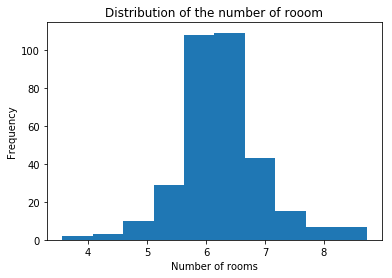

In [4]:
plt.hist(boston_data['rm'])
plt.title('Distribution of the number of rooom')
plt.ylabel('Frequency')
plt.xlabel('Number of rooms')
plt.show()

In [5]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


### Select the dependent and the indenpendence variable 

We selected the column rm(average number of rooms per dwelling) as the independent variable oe features while we selected the last column medv (median value of owner-occupied homes in $1000s) as the dependent variable or target. We did this because the numbr of rooms should affect the value of the owner occupied homes 

In [6]:
boston_data.corr()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


In [7]:
X = boston_data[['rm']]
y = boston_data.medv

Text(0.5,1,'rm vs medv')

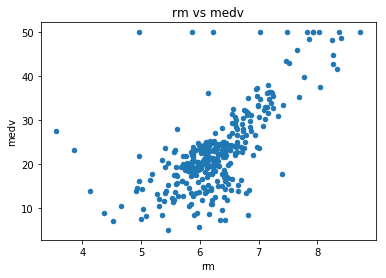

In [8]:
boston_data.plot(kind="scatter", x='rm', y='medv')
plt.title('rm vs medv')

###  Splitting the dataset into the Training set and Test set
The data we use is splitted into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Linear Regression 
### Linear Regression with Statsmodels

Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [10]:
import statsmodels.api as sm
#SM_X_train = sm.add_constant(X_train) ## let's add an intercept (beta_0) to our model

#Create a model and train the model
SM_model = sm.OLS(y_train,X_train).fit() #OLS - Ordinary Least Squares 

#make prediction with the trained model
SM_predictions =SM_model.predict(X_test)

# Check the  statistics of the data 
SM_model.summary()

C:\Users\John Robert\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     2453.
Date:                Thu, 13 Sep 2018   Prob (F-statistic):          5.68e-136
Time:                        08:16:07   Log-Likelihood:                -917.51
No. Observations:                 266   AIC:                             1837.
Df Residuals:                     265   BIC:                             1841.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rm             3.6781      0.074     49.528      0.000       3.532       3.824
==============================================================================
Omnibus:                       48.869   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.121
Skew:                           0.966   Prob(JB):                     1.63e-20
Kurtosis:                       5.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**OLS** stands for Ordinary Least Squares 
**method** “Least Squares” means that we’re trying to fit a regression line that would minimize the square of distance from the regression line. 
**Date and Time** are pretty self-explanatory
**number of observations, Df of residuals and models** relates to the degrees of freedom, the number of values in the final calculation of a statistic that are free to vary.

**coefficient** of 8.6052 means that as the RM variable increases by 1, the predicted value of MDEV increases by 8.6052.  **R-squared** — the percentage of variance our model explains
**standard error** is the standard deviation of the sampling distribution of a statistic, most commonly of the mean
**t scores and p-values** for hypothesis test
RM has statistically significant p-value, there is a 97.5% confidence intervals for the RM (meaning we predict at a 97.5% percent confidence that the value of RM is between 3.562 to 3.894).

**Without a constant we are forcing our model to go through the origin, but now we have a y-intercept at -31.0757.**

In [11]:
#checking the performance of the model 
SM_pred_df = pd.DataFrame({'Expected':y_test, 'Predicted':SM_predictions })
SM_pred_df.head(10)

,Expected,Predicted
56,22.9,22.682664
54,28.0,24.742383
276,11.0,22.778293
101,15.4,20.586163
59,22.5,22.123597
49,23.4,22.969553
196,23.9,22.535541
280,14.3,23.672065
215,25.0,23.594825
198,20.3,21.296031


### Using sklearn library 

SKLearn has many learning algorithms, for regression, classification, clustering and dimensionality reduction

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
#y_test = sc_y.fit_transform(y_test)

In [12]:
from sklearn.linear_model import LinearRegression 

#create model 
linReg = LinearRegression()

#Fit and train the linear model
linReg.fit(X_train,y_train)

##make prediction with the trained model
linReg_prediction = linReg.predict(X_test)


In [13]:
#checking the performance of the model 
linReg_pred_df = pd.DataFrame({'Expected':y_test, 'linear regression Predicted':linReg_prediction  })
linReg_pred_df.head(10)

,Expected,linear regression Predicted
56,22.9,21.856651
54,28.0,26.561242
276,11.0,22.075079
101,15.4,17.068050
59,22.5,20.579691
49,23.4,22.511934
196,23.9,21.520609
280,14.3,24.116535
215,25.0,23.940113
198,20.3,18.689454


In [14]:
#get the coefficient 
coefficient = linReg.coef_
print('Coefficient = {}'.format(coefficient))

Coefficient = [8.40105461]


In [15]:
#get the intercept
intercept = linReg.intercept_
print('Intercept = {}'.format(intercept))

Intercept = -29.952652325812075


In [17]:
#Calculate the r square score 
Lin_reg_score = linReg.score(X_test,y_test)
print('R squared score for Linear regression model is {} '.format(Lin_reg_score))

R squared score for Linear regression model is 0.595227899238163 


This is the R² score of our model

In [18]:
#Apply K-Fold cross Validation 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = linReg,X = X_train, y = y_train,cv = 10,n_jobs = -1)
avg_accuracies = accuracies.mean()
print('Average Accuracies {}'.format(avg_accuracies))
print('Standard deviation of  Accuracies {}'.format(accuracies.std()))

Average Accuracies 0.30157879704048085
Standard deviation of  Accuracies 0.3249087527486407


+ Cross Validation is used to assess the predictive performance of the models and and to judge how they perform outside the sample to a new data set

In [19]:
from sklearn import metrics  
print('Linear regression errors ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, linReg_prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, linReg_prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, linReg_prediction))) 


Linear regression errors 
Mean Absolute Error: 3.9895049820827913
Mean Squared Error: 35.58813477532708
Root Mean Squared Error: 5.96557916512111


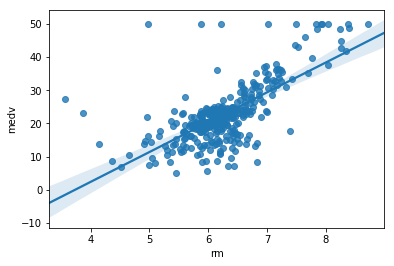

In [20]:
import seaborn as sns 
#plot the data 
sns.regplot(x='rm', y='medv', data = boston_data, fit_reg=True )
plt.show()

In [ ]:
#Visualizing train data 
plt.scatter(X_test,y_test, color ='red')
plt.plot(X_test,linReg_prediction, color ='blue')
plt.title('rm vs medv (test set)')
plt.xlabel('rm')
plt.ylabel('medv')
plt.show()

In [ ]:
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
    